In [1]:
import pandas as pd
file_path = 'online_retail.xlsx'

# Check sheet names first
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)

['Year 2009-2010', 'Year 2010-2011']


In [2]:
data_2009 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
data_2010 = pd.read_excel(file_path, sheet_name='Year 2010-2011')

In [3]:
combined_data = pd.concat([data_2009, data_2010], ignore_index=True)
print(combined_data.shape)
combined_data.head()

(1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [5]:
combined_data = combined_data.drop_duplicates()

In [6]:
combined_data.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

In [7]:
combined_data.columns = combined_data.columns.str.replace(' ', '_')
combined_data['Description'] = combined_data['Description'].fillna('No Description')

In [8]:
# Keep only valid sales for main EDA

# Remove null Customer ID
combined_data = combined_data.dropna(subset=['Customer_ID'])

# Remove negative or zero quantities
combined_data = combined_data[combined_data['Quantity'] > 0]

# Remove negative or zero price
combined_data = combined_data[combined_data['Price'] > 0]

In [9]:
combined_data['Revenue'] = combined_data['Quantity'] * combined_data['Price']

In [10]:
combined_data['Year'] = combined_data['InvoiceDate'].dt.year
combined_data['Month'] = combined_data['InvoiceDate'].dt.month
combined_data['DayOfWeek'] = combined_data['InvoiceDate'].dt.day_name()

In [11]:
print(combined_data.shape)
combined_data.head()

(779425, 12)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Revenue,Year,Month,DayOfWeek
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,Tuesday


In [12]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779425 entries, 0 to 1067370
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779425 non-null  object        
 1   StockCode    779425 non-null  object        
 2   Description  779425 non-null  object        
 3   Quantity     779425 non-null  int64         
 4   InvoiceDate  779425 non-null  datetime64[ns]
 5   Price        779425 non-null  float64       
 6   Customer_ID  779425 non-null  float64       
 7   Country      779425 non-null  object        
 8   Revenue      779425 non-null  float64       
 9   Year         779425 non-null  int32         
 10  Month        779425 non-null  int32         
 11  DayOfWeek    779425 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(5)
memory usage: 71.4+ MB


In [13]:
combined_data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer_ID    0
Country        0
Revenue        0
Year           0
Month          0
DayOfWeek      0
dtype: int64

In [14]:
combined_data.to_csv('cleaned_online_retail_data.csv', index=False)

In [16]:
combined_data.Revenue.describe()

count    779425.000000
mean         22.291823
std         227.427075
min           0.001000
25%           4.950000
50%          12.480000
75%          19.800000
max      168469.600000
Name: Revenue, dtype: float64

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

In [18]:
# 1. Total number of unique customers
unique_customers = combined_data['Customer_ID'].nunique()
print(f"Total Unique Customers: {unique_customers}")

Total Unique Customers: 5878


Top 10 Customers by Revenue:
Customer_ID
18102.0    580987.04
14646.0    528602.52
14156.0    313437.62
14911.0    291420.81
17450.0    244784.25
13694.0    195640.69
17511.0    172132.87
16446.0    168472.50
16684.0    147142.77
12415.0    144458.37
Name: Revenue, dtype: float64


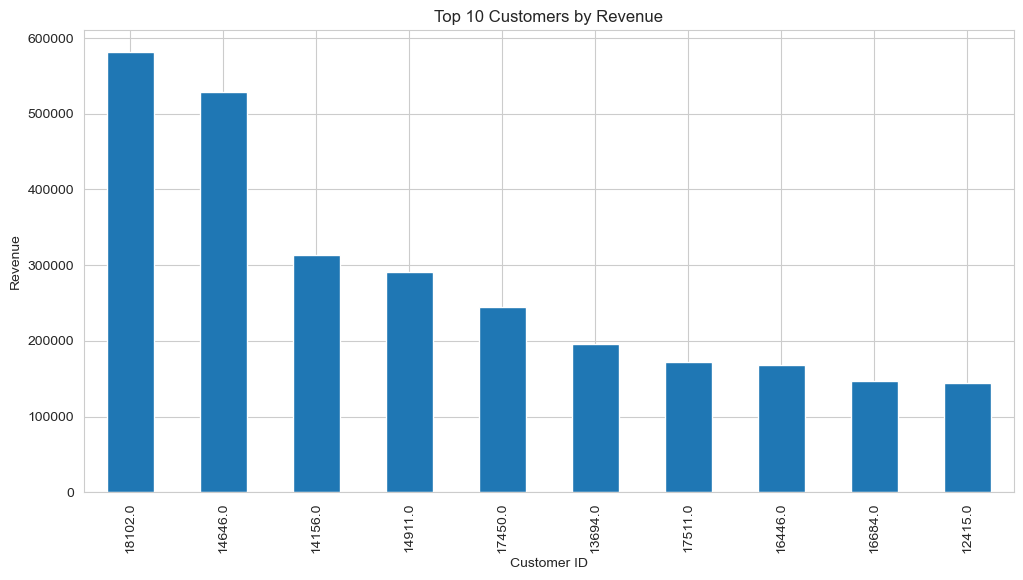

In [19]:
# 2. Total Revenue by Customer
revenue_by_customer = combined_data.groupby('Customer_ID')['Revenue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Revenue:")
print(revenue_by_customer)

# Plot
revenue_by_customer.plot(kind='bar')
plt.title('Top 10 Customers by Revenue')
plt.ylabel('Revenue')
plt.xlabel('Customer ID')
plt.show()

Top 10 Customers by Number of Orders:
Customer_ID
14911.0    398
12748.0    336
17841.0    211
15311.0    208
13089.0    203
14606.0    192
14156.0    156
17850.0    155
14646.0    151
18102.0    145
Name: Invoice, dtype: int64


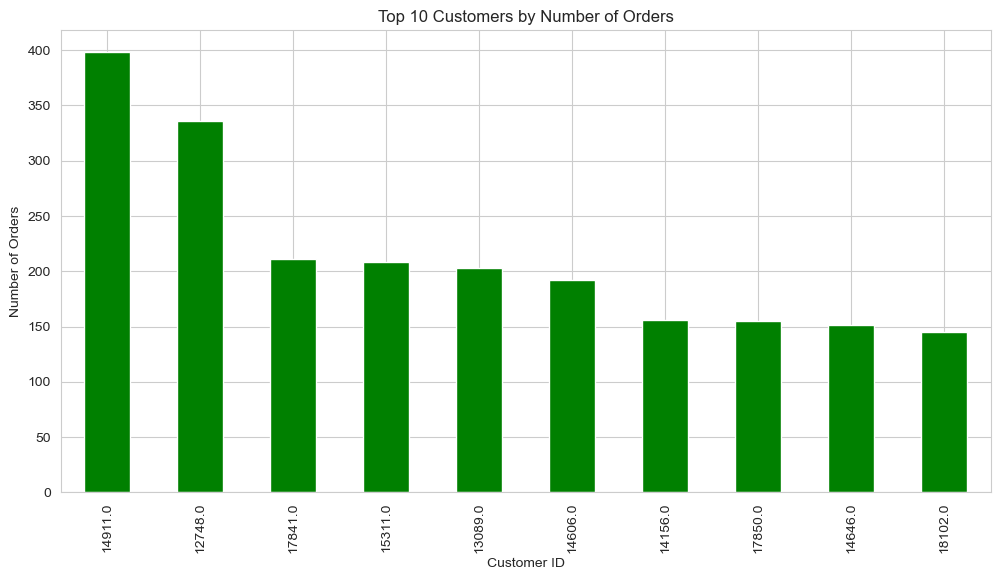

In [20]:
# 3. Top 10 Number of Orders per Customer
orders_per_customer = combined_data.groupby('Customer_ID')['Invoice'].nunique().sort_values(ascending=False).head(10)
print("Top 10 Customers by Number of Orders:")
print(orders_per_customer)

# Plot
orders_per_customer.plot(kind='bar', color='green')
plt.title('Top 10 Customers by Number of Orders')
plt.ylabel('Number of Orders')
plt.xlabel('Customer ID')
plt.show()

Average Order Value: 469.98


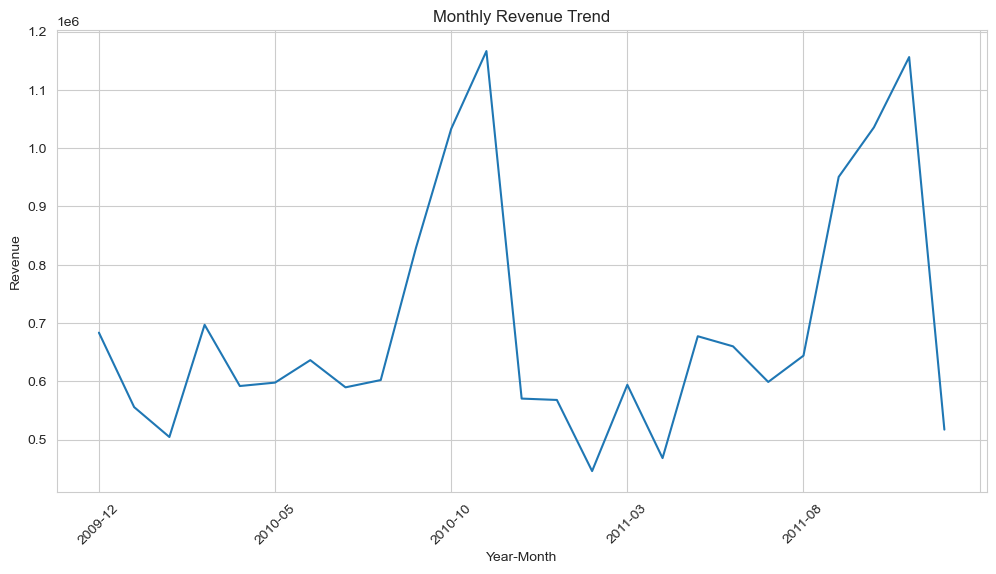

In [21]:
# 4. Average Order Value (Revenue per Invoice)
order_revenue = combined_data.groupby('Invoice')['Revenue'].sum()
avg_order_value = order_revenue.mean()
print(f"Average Order Value: {avg_order_value:.2f}")

# 5. Monthly Revenue Trend (Year-Month)
monthly_revenue = combined_data.groupby(['Year', 'Month'])['Revenue'].sum()
monthly_revenue.index = monthly_revenue.index.map(lambda x: f"{x[0]}-{x[1]:02d}")
monthly_revenue.plot()
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.show()

In [22]:
#Total number of unique countries
total_country_count = len(combined_data.Country.unique())
print(total_country_count)

combined_data.Country.unique()

41


array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon',
       'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

Number of Unique Customers by Country:
Country
United Kingdom    5350
Germany            107
France              95
Spain               41
Belgium             29
Portugal            24
Netherlands         22
Switzerland         22
Sweden              19
Italy               17
Name: Customer_ID, dtype: int64


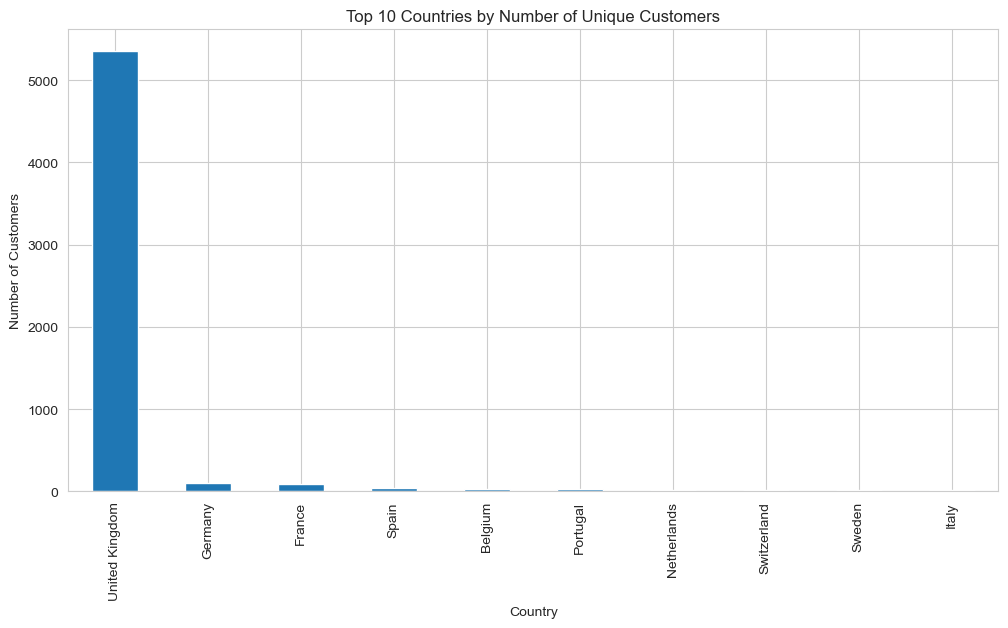

In [23]:
# 6. Customer Distribution by Country
customers_country = combined_data.groupby('Country')['Customer_ID'].nunique().sort_values(ascending=False)
print("Number of Unique Customers by Country:")
print(customers_country.head(10))

# Plot
customers_country.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Number of Unique Customers')
plt.ylabel('Number of Customers')
plt.xlabel('Country')
plt.show()

Revenue by Country:
Country
United Kingdom    1.438923e+07
EIRE              6.165705e+05
Netherlands       5.540381e+05
Germany           4.250197e+05
France            3.487690e+05
Australia         1.692835e+05
Spain             1.083325e+05
Switzerland       1.000619e+05
Sweden            9.151582e+04
Denmark           6.858069e+04
Name: Revenue, dtype: float64


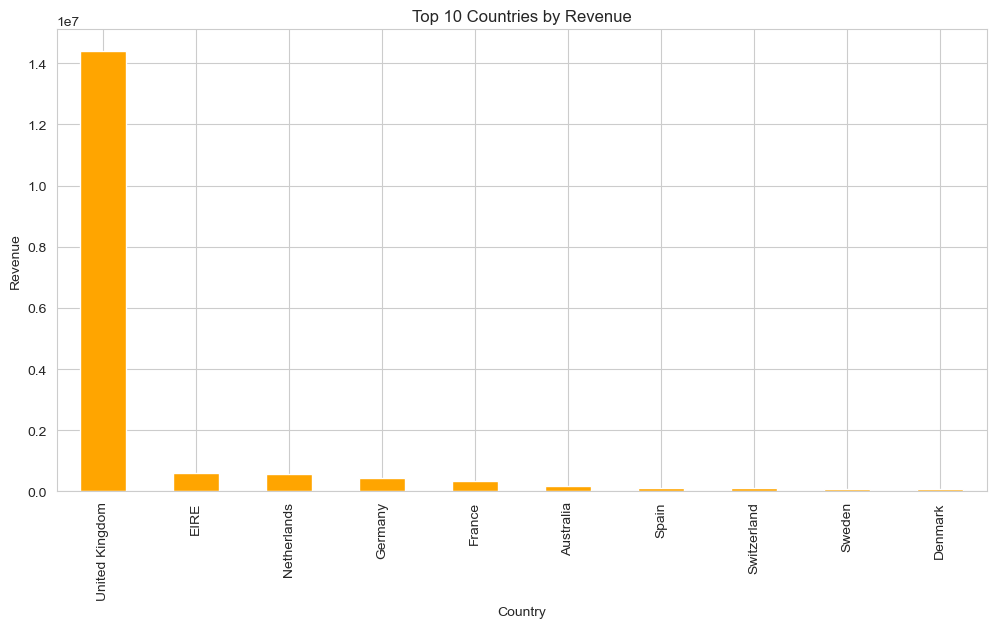

In [24]:
# 7. Revenue Distribution by Country
revenue_country = combined_data.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
print("Revenue by Country:")
print(revenue_country.head(10))

# Plot
revenue_country.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Revenue')
plt.xlabel('Country')
plt.show()

Top 10 Products by Revenue:
Description
REGENCY CAKESTAND 3 TIER              277656.25
WHITE HANGING HEART T-LIGHT HOLDER    247048.01
PAPER CRAFT , LITTLE BIRDIE           168469.60
Manual                                151777.67
JUMBO BAG RED RETROSPOT               134307.44
POSTAGE                               124648.04
ASSORTED COLOUR BIRD ORNAMENT         124351.86
PARTY BUNTING                         103283.38
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
PAPER CHAIN KIT 50'S CHRISTMAS         76598.18
Name: Revenue, dtype: float64


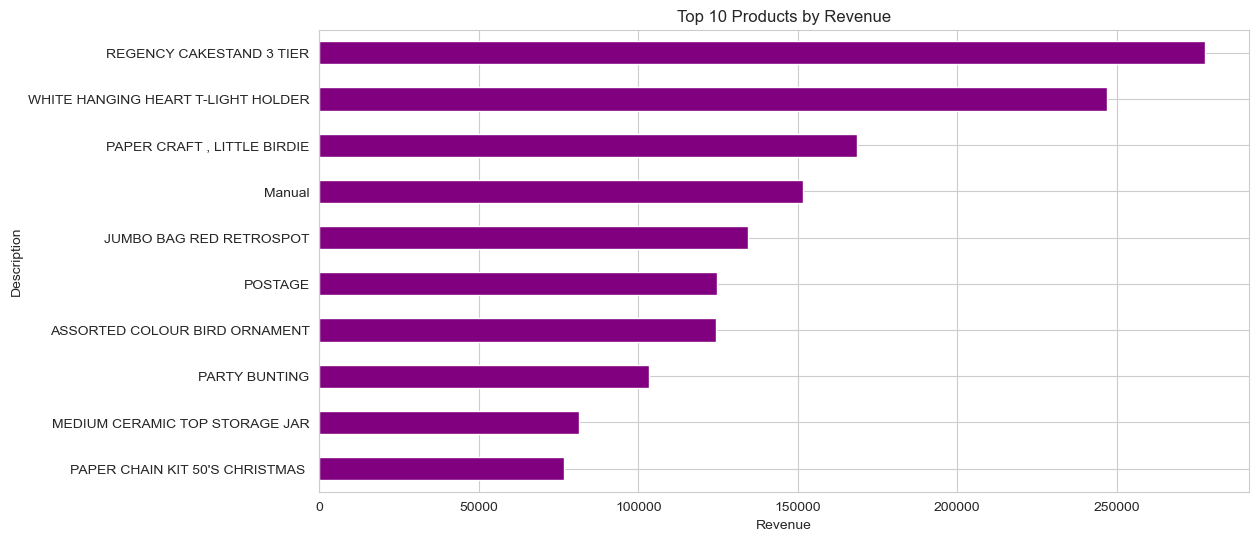

In [25]:
# 8. Top 10 Products by Revenue
top_products = combined_data.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Revenue:")
print(top_products)

# Plot
top_products.plot(kind='barh', color='purple')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.gca().invert_yaxis()  # Highest on top
plt.show()

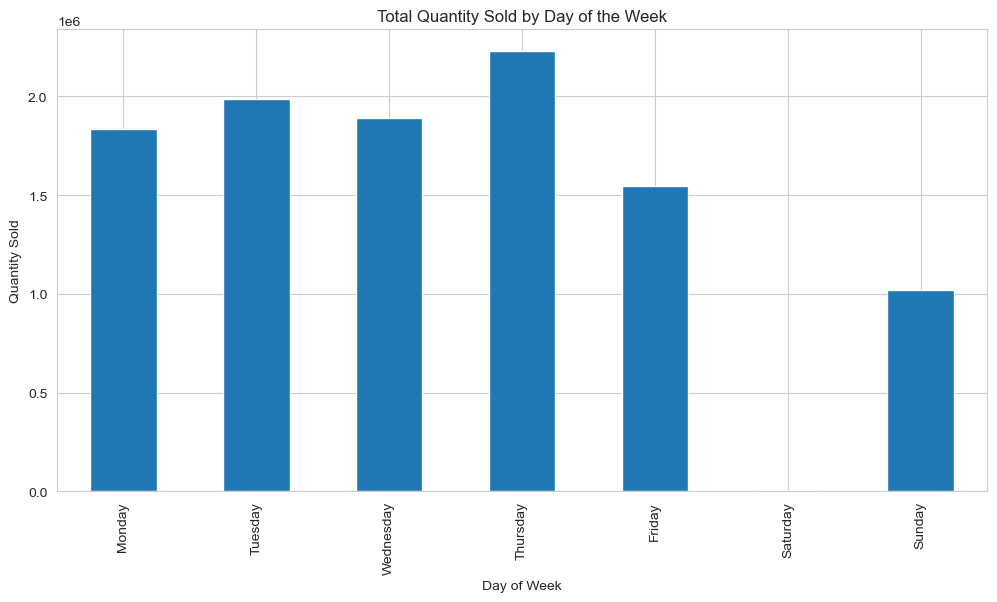

In [26]:
# 9. Quantity Sold by Day of the Week
qty_by_day = combined_data.groupby('DayOfWeek')['Quantity'].sum()

# Order days in natural week order:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
qty_by_day = qty_by_day.reindex(day_order)
qty_by_day.plot(kind='bar')
plt.title('Total Quantity Sold by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Quantity Sold')
plt.show()

Average Revenue per Customer by Country:
Country
EIRE           123314.108000
Singapore       25317.060000
Netherlands     25183.549545
Australia       11285.564000
Denmark          5715.057500
Iceland          4921.530000
Lithuania        4892.680000
Sweden           4816.622105
Switzerland      4548.270000
Norway           4332.500000
Name: Revenue, dtype: float64


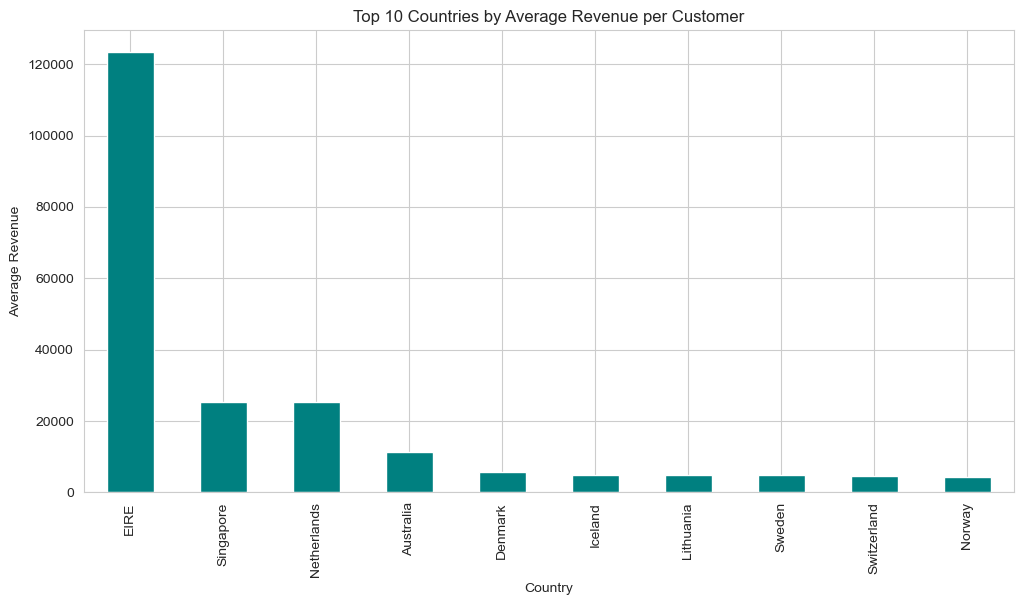

In [27]:
# 10. Average Revenue per Customer by Country (warning‑free)
country_customer_rev = combined_data.groupby( ['Country', 'Customer_ID'])['Revenue'].sum()

# For each Country, take the mean of those per‑customer sums
avg_revenue_customer_country = (
    country_customer_rev
    .groupby('Country')
    .mean()
    .sort_values(ascending=False)
)

print("Average Revenue per Customer by Country:")
print(avg_revenue_customer_country.head(10))

# Plot
avg_revenue_customer_country.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Countries by Average Revenue per Customer')
plt.ylabel('Average Revenue')
plt.xlabel('Country')
plt.show()

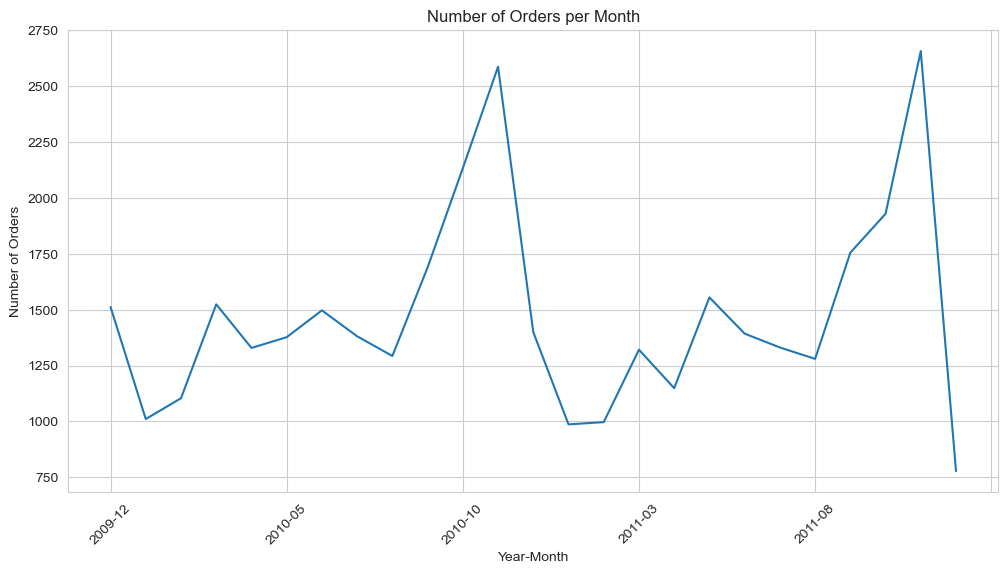

In [28]:
# 11. Number of Orders per Month
orders_per_month = combined_data.groupby(['Year', 'Month'])['Invoice'].nunique()
orders_per_month.index = orders_per_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}")
orders_per_month.plot()
plt.title('Number of Orders per Month')
plt.ylabel('Number of Orders')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.show()

In [29]:
# 12. Customer Retention: Number of months a customer made purchases
customer_months = combined_data.groupby(['Customer_ID'])['Month'].nunique().sort_values(ascending=False)
print("Top 10 Customers by Number of Months Purchased:")
print(customer_months.head(10))

Top 10 Customers by Number of Months Purchased:
Customer_ID
16133.0    12
13999.0    12
15719.0    12
14180.0    12
13199.0    12
13694.0    12
16656.0    12
15203.0    12
12921.0    12
16684.0    12
Name: Month, dtype: int64


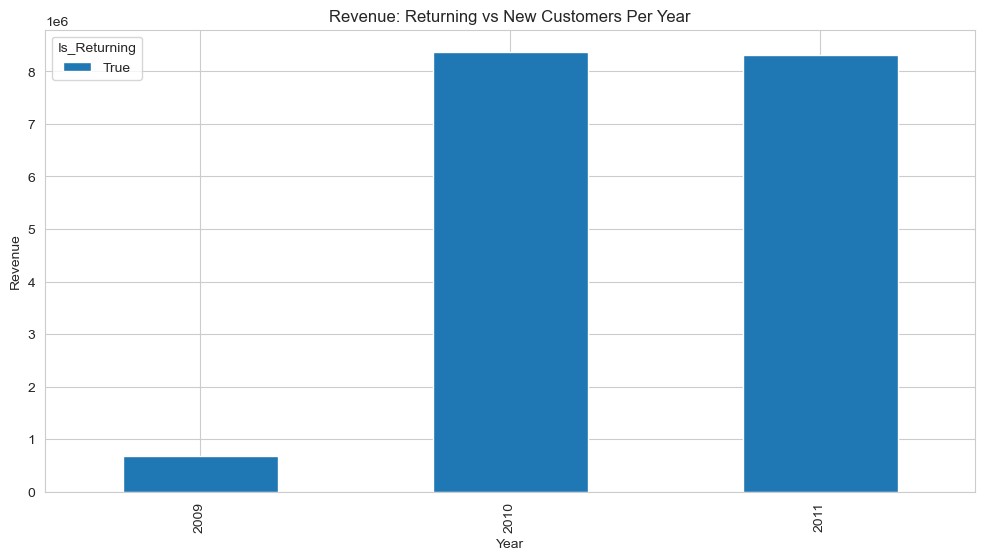

In [30]:
# 13. Percentage of revenue from returning customers vs new customers per year (Assuming Customer_ID '0' = unknown/new customer)
combined_data['Is_Returning'] = combined_data['Customer_ID'] != '0'
yearly_revenue = combined_data.groupby(['Year', 'Is_Returning'])['Revenue'].sum().unstack()
yearly_revenue.plot(kind='bar', stacked=True)
plt.title('Revenue: Returning vs New Customers Per Year')
plt.ylabel('Revenue')
plt.xlabel('Year')
plt.show()

Revenue by Hour:
InvoiceDate
6           4.250
7       75745.570
8      524612.550
9     1484450.541
10    2320711.443
11    2235870.393
12    2690583.501
13    2347078.714
14    1962016.161
15    1839607.762
16    1055274.691
17     484477.632
18     190860.290
19     124825.770
20      38685.000
Name: Revenue, dtype: float64


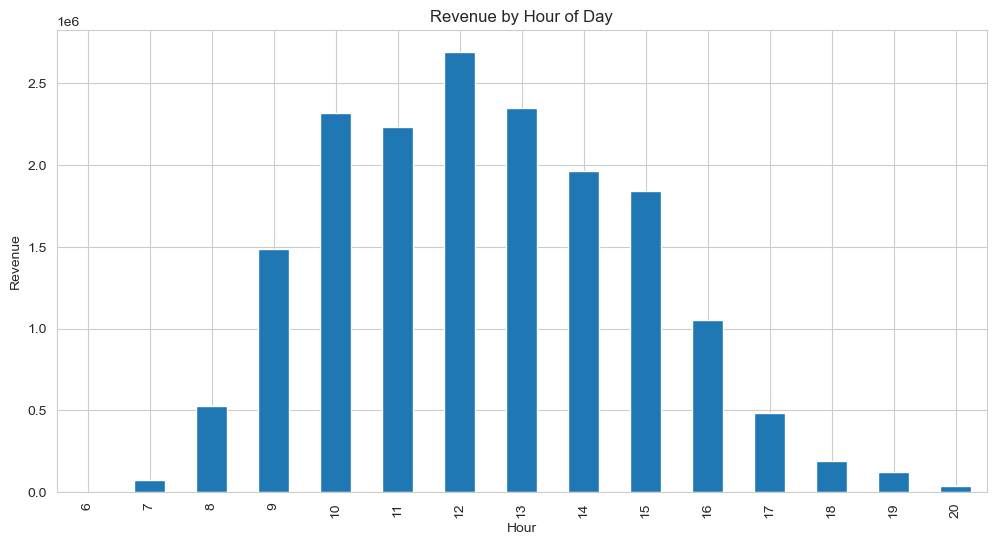

In [31]:
# 14. Revenue by Hour of Day
hourly_rev = combined_data.groupby(combined_data['InvoiceDate'].dt.hour)['Revenue'].sum()
print("Revenue by Hour:")
print(hourly_rev)
hourly_rev.plot(kind='bar')
plt.title('Revenue by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Revenue')
plt.show()

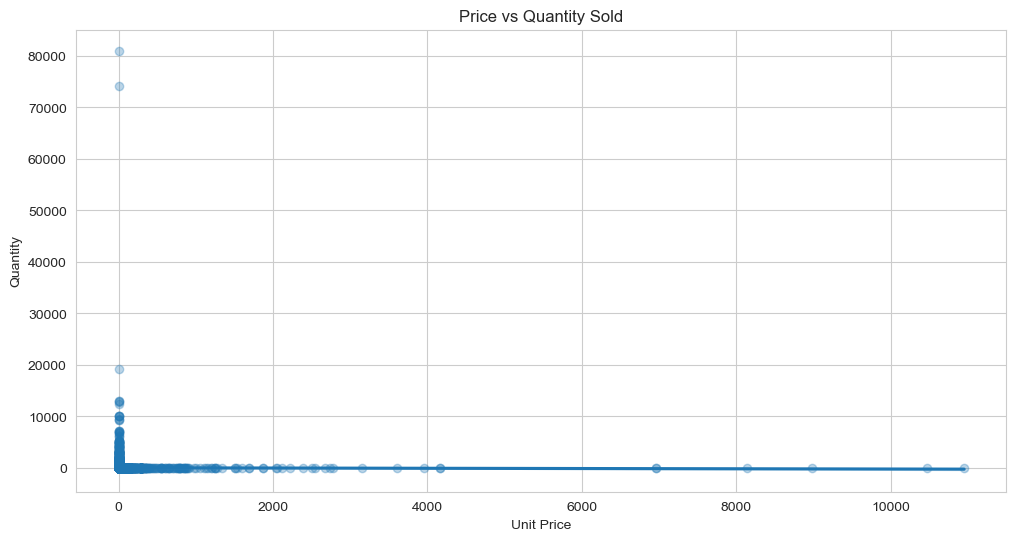

In [32]:
# 15. Price vs. Quantity Scatter with Regression
sns.regplot(x='Price', y='Quantity', data=combined_data, scatter_kws={'alpha':0.3})
plt.title('Price vs Quantity Sold')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.show()

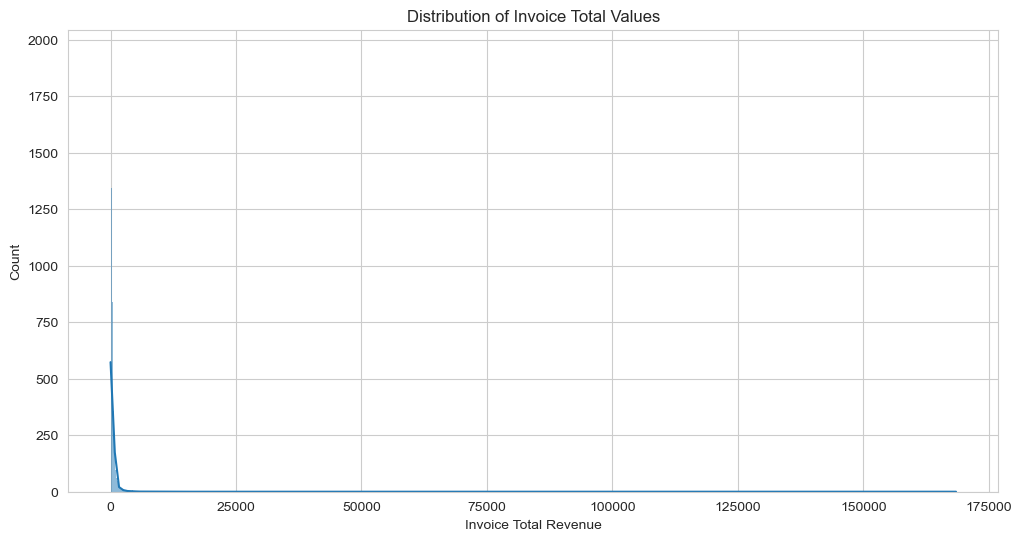

In [33]:
# 16. Distribution of Invoice Values
invoice_vals = combined_data.groupby('Invoice')['Revenue'].sum()
invoice_vals.describe()
sns.histplot(invoice_vals, kde=True)
plt.title('Distribution of Invoice Total Values')
plt.xlabel('Invoice Total Revenue')
plt.show()

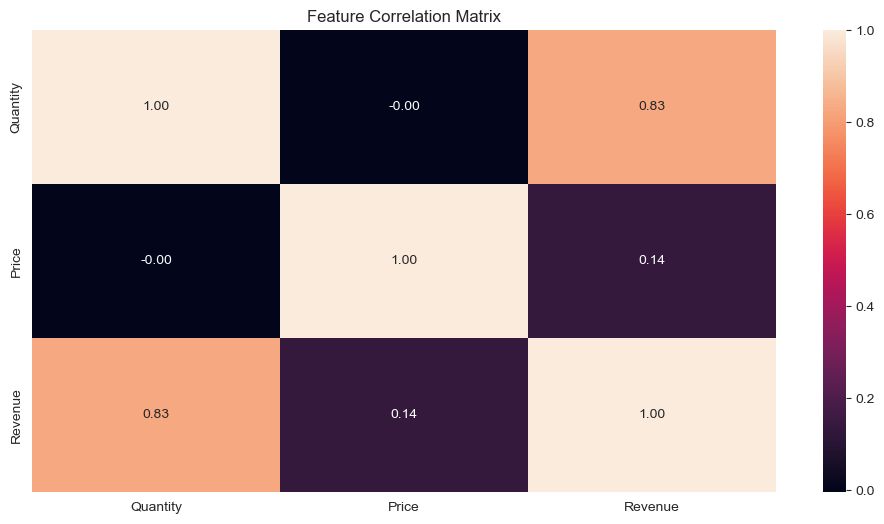

In [34]:
# 17. Correlation Matrix Heatmap
corr = combined_data[['Quantity','Price','Revenue']].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

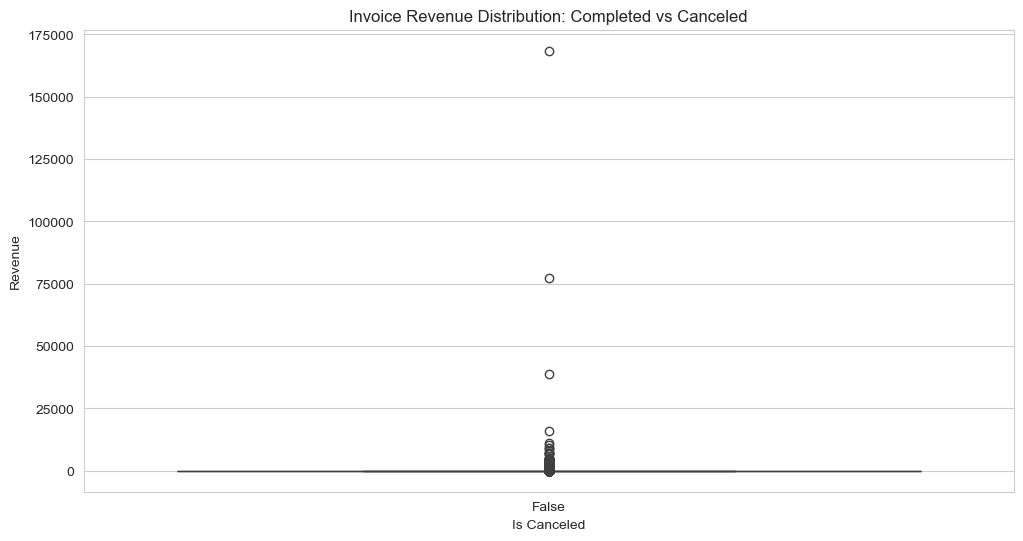

In [36]:
# 19. Boxplot of Revenue per Invoice Type
sns.boxplot(x='Is_Cancel', y='Revenue', data=combined_data)
plt.title('Invoice Revenue Distribution: Completed vs Canceled')
plt.xlabel('Is Canceled')
plt.ylabel('Revenue')
plt.show()

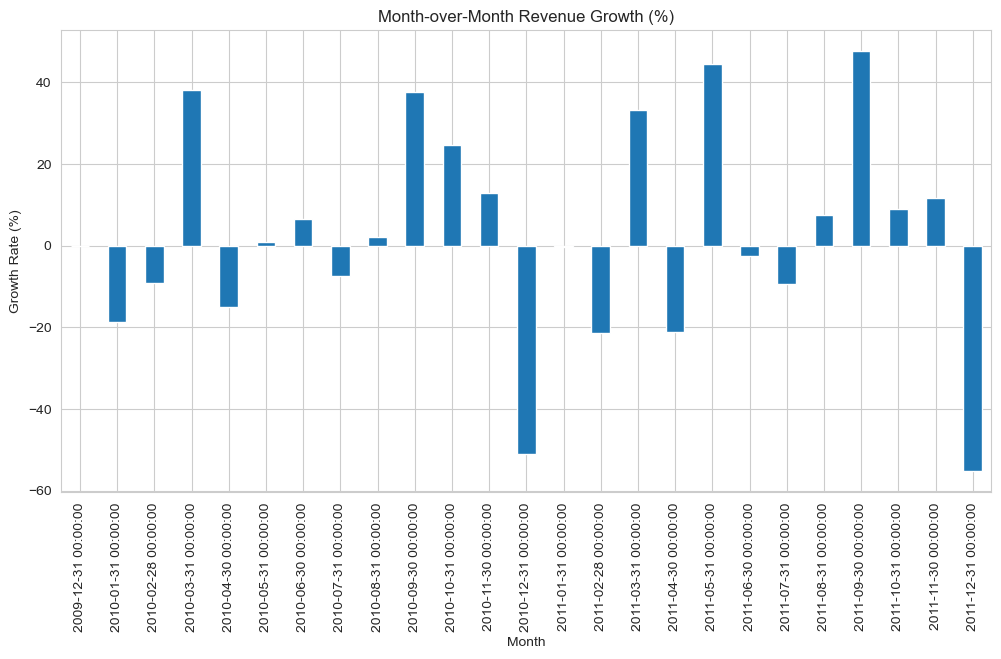

In [38]:
# 20. Monthly Growth Rate of Revenue
monthly = combined_data.resample('ME', on='InvoiceDate')['Revenue'].sum()
monthly_growth = monthly.pct_change().fillna(0) * 100
monthly_growth.plot(kind='bar')
plt.title('Month-over-Month Revenue Growth (%)')
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)')
plt.show()

Top 10 Products by Q4 vs Q1 Growth:
Description
HAND WARMER SCOTTY DOG DESIGN          4451.514286
STAR DECORATION RUSTIC                 3959.000000
HAND WARMER BIRD DESIGN                2150.916667
ROTATING SILVER ANGELS T-LIGHT HLDR    1878.854118
CHRISTMAS LIGHTS 10 REINDEER           1748.200000
SET OF 6 NATIVITY MAGNETS              1473.360577
SET OF 20 VINTAGE CHRISTMAS NAPKINS     818.977540
HAND WARMER UNION JACK                  718.660000
60 CAKE CASES VINTAGE CHRISTMAS         705.028030
CHRISTMAS HANGING TREE WITH BELL        660.880000
Name: Revenue, dtype: float64


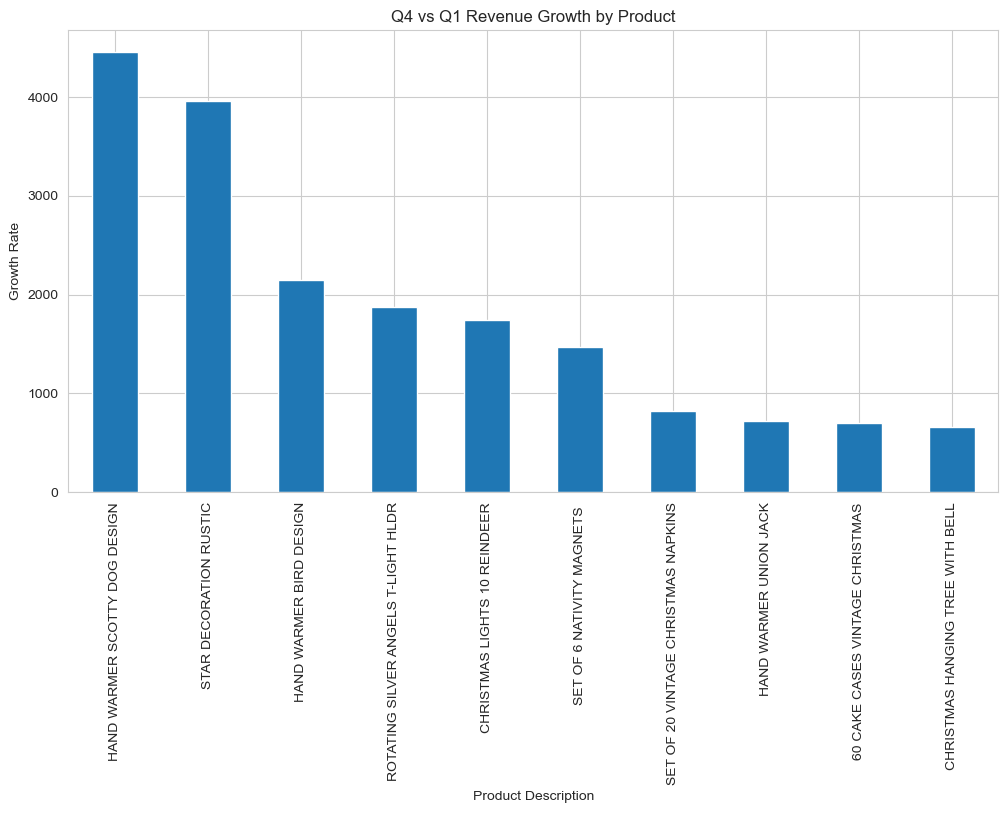

In [39]:
# 21. Top 10 Fast‑Growing Products (Last vs First Quarter)
first_q = combined_data[combined_data['Month'].isin([1,2,3])].groupby('Description')['Revenue'].sum()
last_q  = combined_data[combined_data['Month'].isin([10,11,12])].groupby('Description')['Revenue'].sum()
growth = ((last_q - first_q) / first_q).dropna().sort_values(ascending=False).head(10)
print("Top 10 Products by Q4 vs Q1 Growth:")
print(growth)
growth.plot(kind='bar')
plt.title('Q4 vs Q1 Revenue Growth by Product')
plt.ylabel('Growth Rate')
plt.xlabel('Product Description')
plt.show()

RFM head:
             Recency  Frequency  Monetary
Customer_ID                              
12346.0          326         12  77556.46
12347.0            2          8   4921.53
12348.0           75          5   2019.40
12349.0           19          4   4428.69
12350.0          310          1    334.40


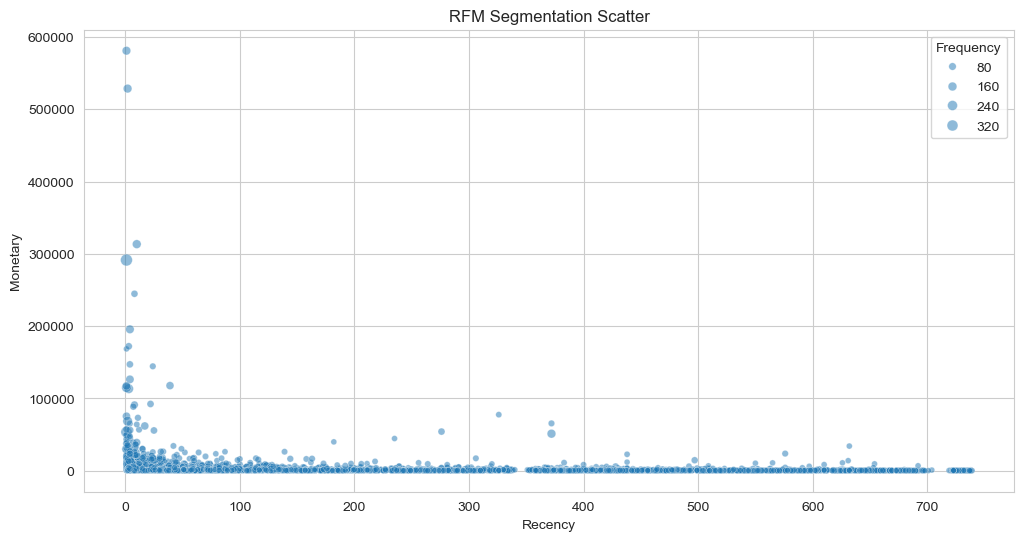

In [40]:
# 22. RFM Segmentation: Recency, Frequency, Monetary
import datetime as dt
now = combined_data['InvoiceDate'].max() + dt.timedelta(days=1)
rfm = combined_data.groupby('Customer_ID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,
    'Invoice': 'nunique',
    'Revenue': 'sum'
}).rename(columns={
    'InvoiceDate':'Recency',
    'Invoice':'Frequency',
    'Revenue':'Monetary'
})
print("RFM head:")
print(rfm.head())
sns.scatterplot(x='Recency', y='Monetary', size='Frequency',
                data=rfm, alpha=0.5)
plt.title('RFM Segmentation Scatter')
plt.show()